In [47]:
# pip install textblob
!pip install -U textblob

In [1]:
# Load preprocess, emoji functions
from ipynb.fs.defs.textblob import convert_emojis
from ipynb.fs.full.Unicode_emojis import UNICODE_EMO

NameError: name '__file__' is not defined

In [110]:
# Import dependencies

# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator)
from datetime import datetime


# Load preprocess function

# Load textblob module
from textblob import TextBlob


# set option to see full tweet text
pd.set_option('display.max_colwidth', None)

In [2]:
# Load twitter data
data = pd.read_csv("tweet_data_11.21.20.csv")

# Select columns and rename
columns = ["created_at", "id", "text", "public_metrics.retweet_count", 
           "public_metrics.reply_count", "public_metrics.like_count", "public_metrics.quote_count"]

data = data[columns]
data = data.rename(columns={"public_metrics.retweet_count": "retweets", "public_metrics.reply_count": "replies", 
                            "public_metrics.like_count": "likes", "public_metrics.quote_count": "quotes"})
data.head()

,created_at,id,text,retweets,replies,likes,quotes
0,2020-11-21T14:42:11.000Z,1330159581255897095,"Man, we were ready to play with COVID positive players.\n\nFixed that for ya, Trevor! https://t.co/DxgpLNroKr",0.0,0.0,0.0,0.0
1,2020-11-21T14:42:11.000Z,1330159581226557442,"@DiscernedEd @mmjblair @emilia_suze My dad had his flu vax a couple of wks ago, 2 days later woke during night with high temp, pounding headache and next morning had lost his sense of smell! He booked a covid test which came back negative. Coincidence? Who knows.",0.0,0.0,0.0,0.0
2,2020-11-21T14:42:11.000Z,1330159581121695748,Congratulations! @msm_prc @MSM_NCPC @COVID_19Network https://t.co/aOIrw2uyke,0.0,0.0,0.0,0.0
3,2020-11-21T14:42:11.000Z,1330159581104889856,"After spending a lot of time with my mom in the hospital for a week, I have scheduled an appointment for a covid test for tomorrow morning. I feel fine but I want to protect those around me just incase I am asymptomatic. I don't want to unknowingly put others at risk.",0.0,0.0,0.0,0.0
4,2020-11-21T14:42:11.000Z,1330159580786077704,My last ex girlfriend said Covid was a ploy to get all the depressed people locked into their homes to basically kill themselves off. That shit lives rent free in my head lol.,0.0,0.0,0.0,0.0


In [3]:
# Drop null values; check for duplicate data

data = data.dropna()
data.reset_index(drop=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200371 entries, 0 to 200372
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   created_at  200371 non-null  object 
 1   id          200371 non-null  int64  
 2   text        200371 non-null  object 
 3   retweets    200371 non-null  float64
 4   replies     200371 non-null  float64
 5   likes       200371 non-null  float64
 6   quotes      200371 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.2+ MB


In [4]:
# Convert "created_at" from ISO 8601 to datetime; extract year and time info; round time to minutes

data["created_at"] = pd.to_datetime(data["created_at"], utc=True)
data["date"] = data["created_at"].dt.date
data["time"] = data["created_at"].dt.round('min').dt.time

data.head()


,created_at,id,text,retweets,replies,likes,quotes,date,time
0,2020-11-21 14:42:11+00:00,1330159581255897095,"Man, we were ready to play with COVID positive players.\n\nFixed that for ya, Trevor! https://t.co/DxgpLNroKr",0.0,0.0,0.0,0.0,2020-11-21,14:42:00
1,2020-11-21 14:42:11+00:00,1330159581226557442,"@DiscernedEd @mmjblair @emilia_suze My dad had his flu vax a couple of wks ago, 2 days later woke during night with high temp, pounding headache and next morning had lost his sense of smell! He booked a covid test which came back negative. Coincidence? Who knows.",0.0,0.0,0.0,0.0,2020-11-21,14:42:00
2,2020-11-21 14:42:11+00:00,1330159581121695748,Congratulations! @msm_prc @MSM_NCPC @COVID_19Network https://t.co/aOIrw2uyke,0.0,0.0,0.0,0.0,2020-11-21,14:42:00
3,2020-11-21 14:42:11+00:00,1330159581104889856,"After spending a lot of time with my mom in the hospital for a week, I have scheduled an appointment for a covid test for tomorrow morning. I feel fine but I want to protect those around me just incase I am asymptomatic. I don't want to unknowingly put others at risk.",0.0,0.0,0.0,0.0,2020-11-21,14:42:00
4,2020-11-21 14:42:11+00:00,1330159580786077704,My last ex girlfriend said Covid was a ploy to get all the depressed people locked into their homes to basically kill themselves off. That shit lives rent free in my head lol.,0.0,0.0,0.0,0.0,2020-11-21,14:42:00


In [5]:
# Test textblob sentiment analysis

test = data.loc[0:5]

polarity1 = []
subjectivity1 =[]


for item in range(0, len(test)):
    sent = TextBlob(test['text'][item]).sentiment
    polar = sent[0]
    subject = sent[1]
    polarity1.append(sent[0])
    subjectivity1.append(sent[1])
    print(polar, subject)

# test['polarity'] = polarity
test.insert(9, 'polarity', polarity1, True)
test.insert(10, 'subjectivity', subjectivity1, True)

type(polarity1[0])

0.18409090909090908 0.4151515151515151
-0.027999999999999997 0.188
0.0 0.0
0.4166666666666667 0.5
0.25 0.5916666666666667
0.8 1.0


float

In [7]:
# Create polarity and subjectivity measures for full dataset "tweet_data_11.21.20"

polarity = []
subjectivity =[]


for item in range(0, len(data)):
    try:
        sent = TextBlob(data['text'][item]).sentiment
        polarity.append(sent[0])
        subjectivity.append(sent[1])
    except KeyError:
        polarity.append(float(0))
        subjectivity.append(float(0))
        print('KeyError: Continuing')

        

KeyError: Continuing
KeyError: Continuing


In [8]:
# Insert columns into dataframe
data['polarity'] = polarity
data['subjectivity'] = subjectivity
data.head()

,created_at,id,text,retweets,replies,likes,quotes,date,time,polarity,subjectivity
0,2020-11-21 14:42:11+00:00,1330159581255897095,"Man, we were ready to play with COVID positive players.\n\nFixed that for ya, Trevor! https://t.co/DxgpLNroKr",0.0,0.0,0.0,0.0,2020-11-21,14:42:00,0.184091,0.415152
1,2020-11-21 14:42:11+00:00,1330159581226557442,"@DiscernedEd @mmjblair @emilia_suze My dad had his flu vax a couple of wks ago, 2 days later woke during night with high temp, pounding headache and next morning had lost his sense of smell! He booked a covid test which came back negative. Coincidence? Who knows.",0.0,0.0,0.0,0.0,2020-11-21,14:42:00,-0.028000,0.188000
2,2020-11-21 14:42:11+00:00,1330159581121695748,Congratulations! @msm_prc @MSM_NCPC @COVID_19Network https://t.co/aOIrw2uyke,0.0,0.0,0.0,0.0,2020-11-21,14:42:00,0.000000,0.000000
3,2020-11-21 14:42:11+00:00,1330159581104889856,"After spending a lot of time with my mom in the hospital for a week, I have scheduled an appointment for a covid test for tomorrow morning. I feel fine but I want to protect those around me just incase I am asymptomatic. I don't want to unknowingly put others at risk.",0.0,0.0,0.0,0.0,2020-11-21,14:42:00,0.416667,0.500000
4,2020-11-21 14:42:11+00:00,1330159580786077704,My last ex girlfriend said Covid was a ploy to get all the depressed people locked into their homes to basically kill themselves off. That shit lives rent free in my head lol.,0.0,0.0,0.0,0.0,2020-11-21,14:42:00,0.250000,0.591667


In [ ]:
# ---------------------------------------------------------------------
# Plot sentiment polarity and objectivity
# ---------------------------------------------------------------------

In [119]:
## Create dataframe for plotting sentiment polarity and objectivity

# Group data by time to create sentiment sentiment plot by minute
plot_data = data.groupby('time').mean()
plot_data = plot_data[['polarity', 'subjectivity']]

# Reset index to create separate time column
plot_data = plot_data.reset_index()

# Format time column as string value
plot_data['time'] = plot_data['time'].astype(str)

# Save as CSV file
plot_data.to_csv('sentiment_plot_data.csv', index=False)

# Display ouput
plot_data.head()

,time,polarity,subjectivity
0,00:00:00,0.075843,0.374868
1,00:01:00,0.048355,0.382242
2,00:02:00,0.056218,0.420972
3,00:03:00,0.048547,0.385077
4,00:04:00,0.032307,0.436385


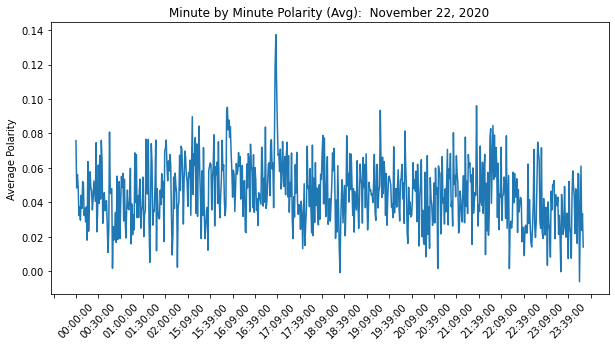

In [152]:
# Graph polarity of sentiment trend

x_axis = plot_data['time']
y1_axis = plot_data['polarity']
y2_axis = plot_data['subjectivity']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title("Minute by Minute Polarity (Avg):  November 22, 2020")
plt.ylabel("Average Polarity")
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.plot(x_axis, y1_axis)
plt.xticks(rotation=45)

plt.show()

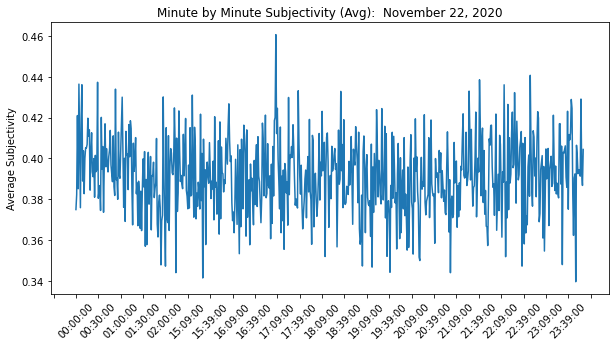

In [153]:
# Graph subjectivity of sentiment trend

x_axis = plot_data['time']
y1_axis = plot_data['polarity']
y2_axis = plot_data['subjectivity']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title("Minute by Minute Subjectivity (Avg):  November 22, 2020")
plt.ylabel("Average Subjectivity")
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.plot(x_axis, y2_axis)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# ---------------------------------------------------------------------
# Plot tweet and retweet count
# ---------------------------------------------------------------------

In [147]:
# Group data by time, count tweest and sum retweets
tweets = data[['time', 'id']].groupby('time').count()
retweets = data[['time', 'retweets']].groupby('time').sum()

# Concatenate datafreams
plot_data1 = tweets.join(retweets)

# Reset index to create separate time column
plot_data1 = plot_data1.reset_index()

# Format time column as string value
plot_data1['time'] = plot_data1['time'].astype(str)

# Display ouput
plot_data1.head()

,time,id,retweets
0,00:00:00,286,17.0
1,00:01:00,297,3.0
2,00:02:00,302,4.0
3,00:03:00,298,6.0
4,00:04:00,284,3.0


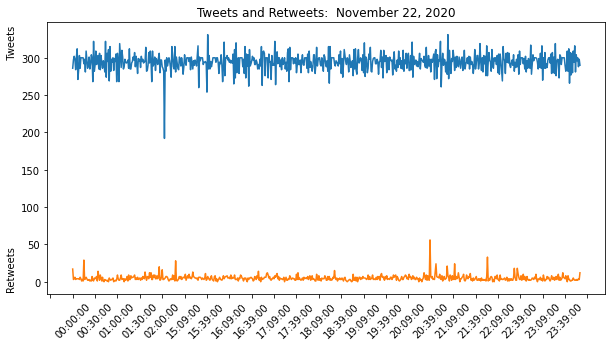

In [154]:
# Graph tweet and retweet count by minute

x_axis = plot_data1['time']
y1_axis = plot_data1['id']
y2_axis = plot_data1['retweets']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title("Tweets and Retweets:  November 22, 2020")
plt.ylabel("Retweets                                                            Tweets")
ax.plot(x_axis, y1_axis, y2_axis)
ax.xaxis.set_major_locator(MultipleLocator(30))
plt.xticks(rotation=45)

plt.show()

In [ ]:
# ---------------------------------------------------------------------
# Identify most retweeted tweets
# ---------------------------------------------------------------------

In [149]:
# Sort data by # retweets
max_retweets = data.sort_values(by='retweets', ascending=False)
max_retweets.head(5)


,created_at,id,text,retweets,replies,likes,quotes,date,time,polarity,subjectivity
104945,2020-11-21 20:38:27+00:00,1330249235166588932,I’m sitting here thinking how incredible it is we have not one but two Covid vaccines literally around the corner. President Trump eliminated endless red tape and withstood severe criticism to find a solution in record time. It is extremely impressive!,49.0,1.0,171.0,1.0,2020-11-21,20:38:00,0.443750,0.662500
4582,2020-11-21 14:57:14+00:00,1330163367055683586,Absolutely devastating. My heart aches for Raiden and every single person left behind in the wake of COVID-19. Please stay safe this weekend.\nhttps://t.co/MB80XzoCaw,24.0,5.0,139.0,0.0,2020-11-21,14:57:00,-0.194286,0.482857
127684,2020-11-21 21:55:18+00:00,1330268578399088641,"Yesterday there were 0 new cases and 0 lost lives reported. There is 1 active case remaining. We received 10,530 test results – thanks Victoria, #EveryTestHelps. More: https://t.co/pcll7ySEgz \n\n#StaySafeStayOpen #COVID19Vic https://t.co/yijW3KLf3E",22.0,2.0,139.0,5.0,2020-11-21,21:55:00,0.175758,0.438636
114565,2020-11-21 21:10:53+00:00,1330257398146232333,"Raiders will activate seven of the 10 players off their COVID-19 list today, per @PGutierrezESPN.\n\nhttps://t.co/ur47aTgoiQ",20.0,3.0,64.0,0.0,2020-11-21,21:11:00,0.000000,0.000000
138073,2020-11-21 22:30:41+00:00,1330277482487042050,"""Get Out! - Go Get a Warrant!"" - Business Owners in Buffalo, New York Stand Up to Cuomo's Covid Orders, Kick Out Sheriff and ""Health Inspector"" (VIDEO) @CristinaLaila1 via @gatewaypundit https://t.co/oK3uSNQsz5",15.0,1.0,38.0,0.0,2020-11-21,22:31:00,0.136364,0.454545


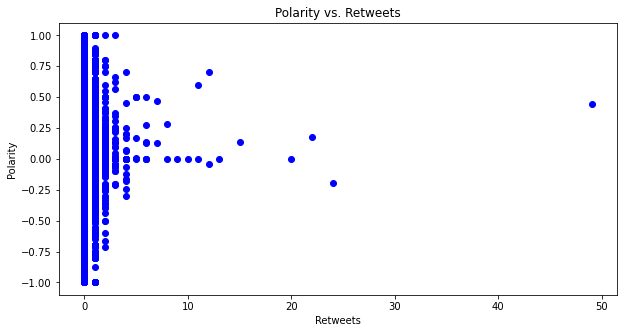

In [155]:
# Plot scatter of retweets and plority to see if any

x_axis = max_retweets['retweets']
y_axis = max_retweets['polarity']

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.title("Polarity vs. Retweets")
plt.xlabel("Retweets")
plt.ylabel("Polarity")
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.show()

In [ ]:
# ---------------------------------------------------------------------
# Create mask, distance, lockdown, and vaccine dataframes and csv files
# ---------------------------------------------------------------------

In [246]:
# Filter by mask
mask_df = data[data['text'].str.contains('mask|face covering')]
mask_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9355 entries, 7 to 200356
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at    9355 non-null   datetime64[ns, UTC]
 1   id            9355 non-null   int64              
 2   text          9355 non-null   object             
 3   retweets      9355 non-null   float64            
 4   replies       9355 non-null   float64            
 5   likes         9355 non-null   float64            
 6   quotes        9355 non-null   float64            
 7   date          9355 non-null   object             
 8   time          9355 non-null   object             
 9   minutes       9355 non-null   int64              
 10  polarity      9355 non-null   float64            
 11  subjectivity  9355 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(3)
memory usage: 950.1+ KB


In [249]:
# Filter by vaccine
vaccine_df = data[data['text'].str.contains('vaccine')]
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7908 entries, 21 to 200277
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at    7908 non-null   datetime64[ns, UTC]
 1   id            7908 non-null   int64              
 2   text          7908 non-null   object             
 3   retweets      7908 non-null   float64            
 4   replies       7908 non-null   float64            
 5   likes         7908 non-null   float64            
 6   quotes        7908 non-null   float64            
 7   date          7908 non-null   object             
 8   time          7908 non-null   object             
 9   minutes       7908 non-null   int64              
 10  polarity      7908 non-null   float64            
 11  subjectivity  7908 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(3)
memory usage: 803.2+ KB


In [250]:
# Filter by lockdown
lockdown_df = data[data['text'].str.contains('lockdown|quarantine|stay at home')]
lockdown_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5706 entries, 7 to 200370
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at    5706 non-null   datetime64[ns, UTC]
 1   id            5706 non-null   int64              
 2   text          5706 non-null   object             
 3   retweets      5706 non-null   float64            
 4   replies       5706 non-null   float64            
 5   likes         5706 non-null   float64            
 6   quotes        5706 non-null   float64            
 7   date          5706 non-null   object             
 8   time          5706 non-null   object             
 9   minutes       5706 non-null   int64              
 10  polarity      5706 non-null   float64            
 11  subjectivity  5706 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(3)
memory usage: 579.5+ KB


In [251]:
# Filter by social distancing
distance_df = data[data['text'].str.contains('social distance|social distancing')]
distance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 22 to 198814
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   created_at    914 non-null    datetime64[ns, UTC]
 1   id            914 non-null    int64              
 2   text          914 non-null    object             
 3   retweets      914 non-null    float64            
 4   replies       914 non-null    float64            
 5   likes         914 non-null    float64            
 6   quotes        914 non-null    float64            
 7   date          914 non-null    object             
 8   time          914 non-null    object             
 9   minutes       914 non-null    int64              
 10  polarity      914 non-null    float64            
 11  subjectivity  914 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2), object(3)
memory usage: 92.8+ KB


In [252]:
# Push dataframes to CSV

mask_df.to_csv('mask_data.csv', index=False)
vaccine_df.to_csv('vaccine_data.csv', index=False)
lockdown_df.to_csv('lockdown_data.csv', index=False)
distance_df.to_csv('distance_data.csv', index=False)